# Principal Component Analysis (PCA)

This notebook provides a step-by-step demonstration of **Principal Component Analysis (PCA)**, a powerful technique for **dimensionality reduction**. We will use the high-dimensional breast cancer dataset from `scikit-learn` to show how PCA can reduce the number of features (from 30 down to 5) while retaining most of the important information.

In [16]:
# Import necessary libraries for data manipulation, visualization, and machine learning.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import specific tools from scikit-learn.
from sklearn.datasets import load_breast_cancer  # The dataset we'll use.
from sklearn.decomposition import PCA             # The PCA algorithm.
from sklearn.preprocessing import StandardScaler  # For feature scaling.

## 1. Load and Explore the Dataset

First, we load the breast cancer dataset and perform a quick exploration to understand its structure, features, and classes.

In [17]:
# Load the breast cancer dataset from scikit-learn.
cancer = load_breast_cancer()

# Print the keys to understand the structure of the dataset object.
print("Dataset Keys:", list(cancer.keys()))
print("\n")
# Print the names of all the features (columns).
print("The feature names are: \n", cancer.feature_names)
print("\n")
# Print the total number of features.
print(f"Number of features: {len(cancer.feature_names)}")
# Print the class names (malignant, benign).
print("The classes of data: \n", cancer.target_names)
# Print the number of samples belonging to each class.
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Dataset Keys: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


The feature names are: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Number of features: 30
The classes of data: 
 ['malignant' 'benign']
Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


## 2. Initial Data Inspection

We'll now look at the raw data's shape and statistical properties. Notice that the features have very different means and standard deviations, highlighting the need for scaling.

In [18]:
# Extract the feature data (the measurements).
original_data = cancer.data
# Extract the target labels (0 for malignant, 1 for benign).
labels = cancer.target

# Print the shape of the data matrix (rows, columns).
print("The shape of the attributes data: \n", original_data.shape)
# Display the mean and standard deviation for each of the 30 features.
# This shows that features are on very different scales.
print(pd.DataFrame(original_data).describe().loc[['mean', 'std']].round(2))

The shape of the attributes data: 
 (569, 30)
         0      1      2       3     4     5     6     7     8     9   ...  \
mean  14.13  19.29  91.97  654.89  0.10  0.10  0.09  0.05  0.18  0.06  ...   
std    3.52   4.30  24.30  351.91  0.01  0.05  0.08  0.04  0.03  0.01  ...   

         20     21      22      23    24    25    26    27    28    29  
mean  16.27  25.68  107.26  880.58  0.13  0.25  0.27  0.11  0.29  0.08  
std    4.83   6.15   33.60  569.36  0.02  0.16  0.21  0.07  0.06  0.02  

[2 rows x 30 columns]


## 3. Step 1: Standardize the Data

PCA is sensitive to the scale of the features. If one feature has a much larger range than others, it will dominate the analysis. To prevent this, we standardize the data so that every feature has a **mean of 0** and a **standard deviation of 1**.

In [19]:
# Create an instance of the StandardScaler.
scaler_op = StandardScaler()
# Standardize the data to have a mean of 0 and a standard deviation of 1.
scaled_data = scaler_op.fit_transform(original_data)

# Display the mean and std of the scaled data to confirm the transformation was successful.
# The mean should be ~0 and the std should be ~1 for all features.
print(pd.DataFrame(scaled_data).describe().loc[['mean', 'std']].round(2))

       0    1    2    3    4    5    6    7    8    9   ...   20   21   22  \
mean -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  ... -0.0  0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       23   24   25   26   27   28   29  
mean  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 30 columns]


## 4. Apply Principal Component Analysis (PCA)

Now we apply PCA to the standardized data. We specify that we want to reduce the original 30 features down to the 5 most important **principal components**.

In [20]:
# Create a PCA instance, specifying that we want to reduce the data to 5 principal components.
pca = PCA(n_components=5)

# Fit the PCA model to the scaled data. This learns the principal components.
pca.fit(scaled_data)
# Transform the scaled data onto the new principal component axes.
# This reduces the dimensionality from 30 features to 5.
pca_features = pca.transform(scaled_data)

# Print the shape before and after PCA to show the dimensionality reduction.
print("Original shape (before PCA): {}".format(str(scaled_data.shape)))
print("Reduced shape (After PCA): {}".format(str(pca_features.shape)))

Original shape (before PCA): (569, 30)
Reduced shape (After PCA): (569, 5)


## 5. Examine PCA Results

After fitting, we can inspect the internal components of the PCA model:
- **Principal Components (Eigenvectors):** These are the new axes of our data. Each component is a linear combination of the original 30 features.
- **Eigenvalues (Explained Variance):** These values tell us how much variance (i.e., information) from the original data is captured by each new principal component.

In [21]:
# Access the principal components (eigenvectors).
principal_components = pca.components_

# Access the explained variance (eigenvalues).
eigenvalues = pca.explained_variance_

# Print the principal components and their corresponding eigenvalues.
print("Principal Components (first 5):")
print(principal_components)
print("\nEigenvalues:")
print(eigenvalues)

Principal Components (first 5):
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]
 [-0.00853124  0.0645499  -0.00931422  0.02869953 -0.1042919  -0.07409157
   0.00273384 -0.02556354 -0.04023994 -0.02257409  0.26848139  0.37463367
   0.26664537  0.21600653  0.30883898  0.15477972  0.17646374  0.22465757
   0.

## 6. Visualize Explained Variance

A crucial part of PCA is understanding how much information is retained. The plot below shows the **explained variance ratio**, which is the percentage of the original data's variance captured by each principal component. The cumulative line shows the total variance captured as we add more components. 

From this, we can see that the first principal component alone captures over 44% of the variance, and the five components together capture over 84%.

Explained variance ratio for each component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]

Total variance captured by 5 components: 0.8473


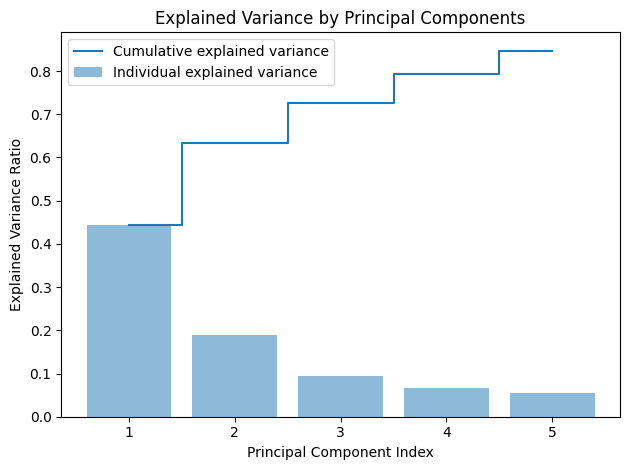

In [22]:
# Get the percentage of variance explained by each principal component.
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each component:", var_ratio)

# Calculate the cumulative sum of the explained variance ratios.
cum_sum_eigenvalues = np.cumsum(var_ratio)
print(f"\nTotal variance captured by 5 components: {cum_sum_eigenvalues[-1]:.4f}")

# Create a bar plot for the individual explained variance of each component.
plt.bar(range(1, len(var_ratio) + 1), var_ratio, alpha=0.5, align='center', label='Individual explained variance')
# Create a step plot for the cumulative explained variance.
plt.step(range(1, len(cum_sum_eigenvalues) + 1), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# --- Experiment Setup ---
# Initialize an empty list to store the accuracy results for each value of K.
results = []


# --- 1. KNN on Original High-Dimensional Data ---

# Split the ORIGINAL data (30 features) into training (80%) and testing (20%) sets.
# Using random_state=42 ensures that the split is the same every time, which is crucial for a fair comparison.
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(original_data, labels, test_size=0.2, random_state=42)

# Loop through K values from 1 to 10 to find the optimal number of neighbors.
for k in range(1, 11):
    # Create an instance of the KNeighborsClassifier with the current value of K.
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train (fit) the model on the original training data.
    knn.fit(X_train_orig, y_train_orig)
    
    # Make predictions on the original test data.
    y_pred = knn.predict(X_test_orig)
    
    # Calculate the accuracy by comparing the predictions to the true labels.
    accuracy = accuracy_score(y_test_orig, y_pred)
    
    # Append the result as a dictionary to our results list.
    results.append({'K': k, 'Accuracy (Original)': accuracy})


# --- 2. KNN on PCA-Reduced Data ---

# Split the PCA-REDUCED data (5 features) into training and testing sets.
# Using the same random_state=42 ensures we are training and testing on the same underlying samples as before.
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_features, labels, test_size=0.2, random_state=42)

# Loop again through K values from 1 to 10.
# enumerate() provides an index 'i' to update the dictionaries already in the 'results' list.
for i, k in enumerate(range(1, 11)):
    # Create and train a new KNN model on the PCA-reduced training data.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train_pca)
    
    # Make predictions on the PCA-reduced test data.
    y_pred = knn.predict(X_test_pca)
    
    # Calculate the accuracy for the PCA-based model.
    accuracy = accuracy_score(y_test_pca, y_pred)
    
    # Add the PCA accuracy result to the corresponding dictionary in the 'results' list.
    results[i]['Accuracy (PCA)'] = accuracy


# --- 3. Display Results ---

# Convert the list of dictionaries into a pandas DataFrame for a clean, tabular display.
results_df = pd.DataFrame(results)

# Ensure the 'K' column is treated as an integer.
results_df['K'] = results_df['K'].astype(int)

# Format the accuracy columns to be percentages rounded to two decimal places.
results_df[['Accuracy (Original)', 'Accuracy (PCA)']] = results_df[['Accuracy (Original)', 'Accuracy (PCA)']].apply(lambda x: (x*100).round(2))

# Print the final comparison table.
print("\nKNN Accuracy Comparison Table:")
# .to_string(index=False) provides a clean printout without the DataFrame index.
print(results_df.to_string(index=False))


KNN Accuracy Comparison Table:
 K  Accuracy (Original)  Accuracy (PCA)
 1                92.98           94.74
 2                92.98           94.74
 3                92.98           95.61
 4                93.86           94.74
 5                95.61           94.74
 6                96.49           95.61
 7                95.61           96.49
 8                95.61           95.61
 9                95.61           96.49
10                97.37           96.49
